In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [45]:
POBLACION_SIZE = 100
CROMOZOMA_SIZE = 30
TASA_CRUZAMIENTO = 0.8
TASA_MUTACION = 0.003
N_Generaciones = 10
X_bound = [0,15]


In [46]:
print(type(X_bound))

<class 'list'>


In [58]:
def function1(x):
    #return np.sin(10*x)*x + np.cos(2*x)*x
    return abs((x-5)/(2+np.sin(x)))

#print(function1(10))


[[1 0 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [1 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]]
[ 0.          0.07537688  0.15075377  0.22613065  0.30150754  0.37688442
  0.45226131  0.52763819  0.60301508  0.67839196  0.75376884  0.82914573
  0.90452261  0.9798995   1.05527638  1.13065327  1.20603015  1.28140704
  1.35678392  1.4321608   1.50753769  1.58291457  1.65829146  1.73366834
  1.80904523  1.88442211  1.95979899  2.03517588  2.11055276  2.18592965
  2.26130653  2.33668342  2.4120603   2.48743719  2.56281407  2.63819095
  2.71356784  2.78894472  2.86432161  2.93969849  3.01507538  3.09045226
  3.16582915  3.24120603  3.31658291  3.3919598   3.46733668  3.54271357
  3.61809045  3.69346734  3.76884422  3.84422111  3.91959799  3.99497487
  4.07035176  4.14572864  4.22110553  4.29648241  4.3718593   4.44723618
  4.52261307  4.59798995  4.67336683  4.74874372  4.8241206   4.89949749
  4.97487437  5.05025126  5.12562814  5.20100503  5.27638191  5.35175879
  5.

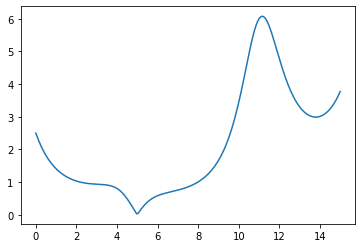

In [59]:
pob = np.random.randint(2, size = (POBLACION_SIZE,CROMOZOMA_SIZE))
plt.ion()

#dibujo los puntos en un gráfico/ repartir punto
x = np.linspace(*X_bound,200)

print(pob)
print(x)
plt.plot(x,function1(x))

    


In [60]:
#forma de una estructura
pob.shape


(100, 30)

In [61]:
def fitness(p):
    return p +1e-3 - np.min(p)


In [62]:
1e-3

0.001

In [63]:
#mapear los valores binarios 
def converter_extreme(pob):
    return pob.dot(2**np.arange(CROMOZOMA_SIZE)[::-1])/float(2**CROMOZOMA_SIZE -1)* X_bound[1]

#converter_extreme(pob)



In [64]:
def selection(pob,fitness):
    id = np.random.choice(np.arange(POBLACION_SIZE), size = POBLACION_SIZE, replace = True, p = fitness/fitness.sum())
    return pob[id]

In [65]:
#
def mixture(padre,pob):
    if np.random.rand()<TASA_CRUZAMIENTO:
        i_=np.random.randint(0,POBLACION_SIZE, size=1)#punto aleatorio entre 0 y el tamaño de la poblacion
        puntos_cruce=np.random.randint(0,2,size= CROMOZOMA_SIZE).astype(np.bool)
        padre[puntos_cruce] = pob[i_,puntos_cruce]
    return padre


In [66]:
#
def mutation(hijo):
    for locus in range (CROMOZOMA_SIZE):
        if np.random.rand()<TASA_MUTACION:
            hijo[locus]=1 if hijo[locus]==0 else 0 
    return hijo 

#type(pob)

5.954190524889389


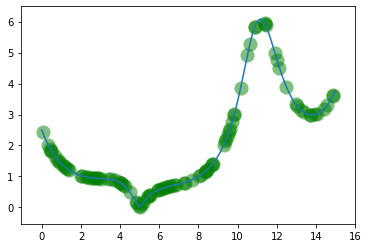

5.910167240646436


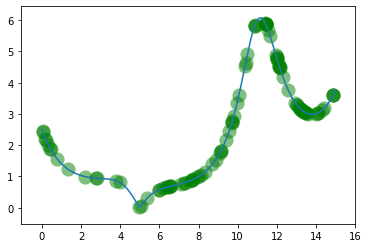

6.065586949158427


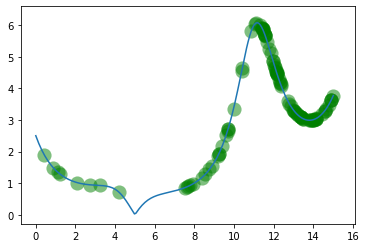

6.077956351512403


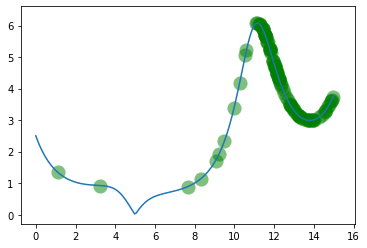

6.077956351512403


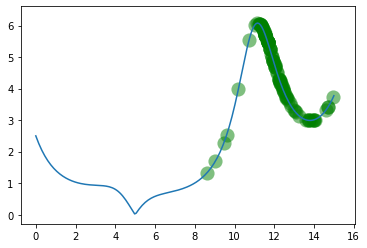

6.0400408184023595


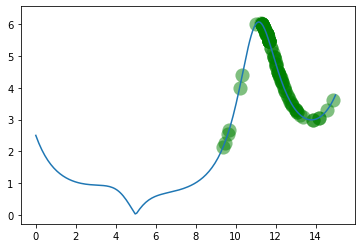

6.052920593517364


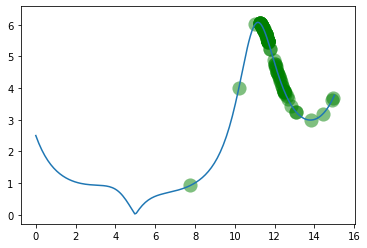

6.051706286302869


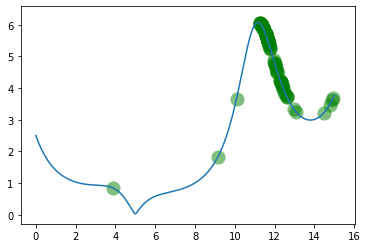

6.052559067635293


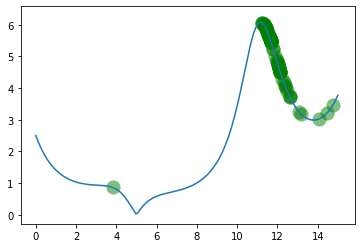

6.053174094507288


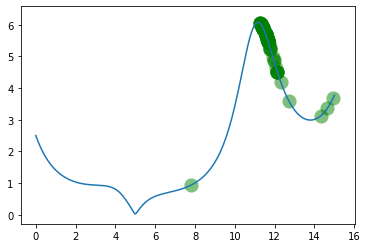

In [67]:
for _ in range(N_Generaciones):
    x = np.linspace(*X_bound,200)
    plt.plot(x,function1(x)) #solo para pintar la funcion
    F_valores = function1(converter_extreme(pob))
    sca=plt.scatter(converter_extreme(pob),F_valores, s=200, lw=0, c="green", alpha=0.5)
    print(max(F_valores))
    plt.pause(0.05)
    
    ##Evolucion:
    fitnessx = fitness (F_valores)
    pob= selection (pob,fitnessx)
    pob_copy = pob.copy() #clone
    
    for padre in pob:
        hijo = mixture(padre,pob_copy)
        hijo = mutation(hijo)
        
        padre[:] = hijo #cromosoma padre es reemplazado por el hijo 
        
plt.ioff();plt.show()
